In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [95]:
data = pd.read_csv('../learningSet.csv')

C:\Users\hugoa\AppData\Local\Temp\ipykernel_18392\2510048271.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../learningSet.csv')


## Check for null values in all the columns

In [96]:
nulls_count_df = pd.DataFrame(data.isna().sum()).reset_index()
nulls_count_df.columns = ['column_name', 'nulls_count']
nulls_count_df

,column_name,nulls_count
0,ODATEDW,0
1,OSOURCE,0
2,TCODE,0
3,STATE,0
4,ZIP,0
...,...,...
476,MDMAUD_R,0
477,MDMAUD_F,0
478,MDMAUD_A,0
479,CLUSTER2,132


Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories

ZIP CODE - we are including state already

In [97]:
drop_list = []

## Identify columns that over 85% missing values

In [98]:
def perc_threshold(data, p=0.85):

    nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>p]
    print(len (list(columns_above_threshold['column_name'])))
    return list(columns_above_threshold['column_name'])

In [99]:
cols_to_remove=perc_threshold(data)
cols_to_remove

25


['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

## Remove those columns from the dataframe

In [100]:
l=["OSOURCE", "ZIP"]
cols_to_remove.extend(l)


In [101]:
data_cleaned = data.drop(columns=cols_to_remove)

## Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [102]:
categorical = data_cleaned.select_dtypes([object])
categorical.head()

,STATE,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,NC,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,FL,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [103]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')
print(categorical['GENDER'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [104]:
def clean_gender(x):
    for value in range(len(x)):
        if "F" in x:
            return "F"
        elif "M" in x:
            return "M"
        elif " " in x:
            return "F"
        else:
            return "other"
categorical["GENDER"]=categorical["GENDER"].apply(clean_gender)

categorical["GENDER"].unique()

array(['F', 'M', 'other'], dtype=object)

# Lab | Feature engineering

Check for null values in the numerical columns

In [105]:
numerical = data.select_dtypes(np.number)
nulls_percent_df=pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()

In [106]:
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [107]:

nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]

,column_name,nulls_percentage
4,NUMCHLD,0.870184
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
9,MBGARDEN,0.553955
10,MBBOOKS,0.553955
...,...,...
383,RAMNT_20,0.917327
384,RAMNT_21,0.900296
385,RAMNT_22,0.781233
386,RAMNT_23,0.917631


### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [108]:
# For Geocode
data["GEOCODE2"].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [109]:
data["GEOCODE2"].unique()

array(['C', 'A', 'D', 'B', ' ', nan], dtype=object)

In [110]:
#Since it is a categorical I will just store the Na into a new category "other", although we could also just add them to "A"

In [113]:
data["GEOCODE2"] = data["GEOCODE2"].fillna("other")

In [114]:
def clean_geo(x):
    
    for value in range(len(x)):
        if " " in x:
            return "other"
        else:
            return x
data["GEOCODE2"]=data["GEOCODE2"].apply(clean_geo)

data["GEOCODE2"].unique()

#I would like to do it all in one step including x.fillna("other") in the function, 
#but for some reason appears an error adverting that fillna does not work on strings when 

array(['C', 'A', 'D', 'B', 'other'], dtype=object)

In [46]:
# For Wealth1
data.WEALTH1.unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

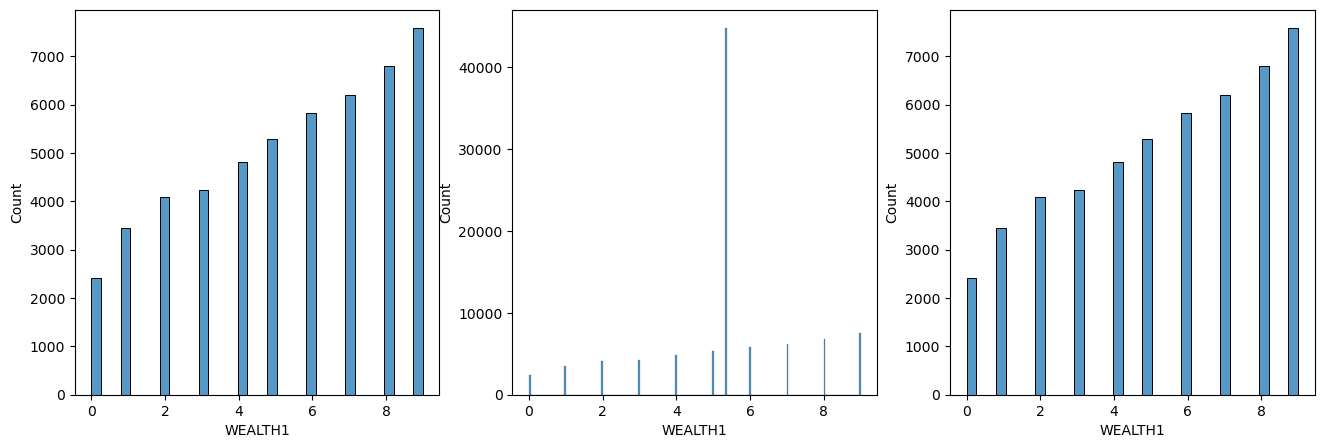

In [85]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data["WEALTH1"], ax = ax[0])
sns.histplot(data["WEALTH1"].fillna(np.mean(data["WEALTH1"])), ax = ax[1])
sns.histplot(data["WEALTH1"].fillna(np.median(data["WEALTH1"])),ax = ax[2])
plt.show()
#Best option is to fill with the median so that we keep the same distribution
data["WEALTH1"]= data["WEALTH1"].fillna(np.median(data["WEALTH1"]))

In [90]:
# For ADI


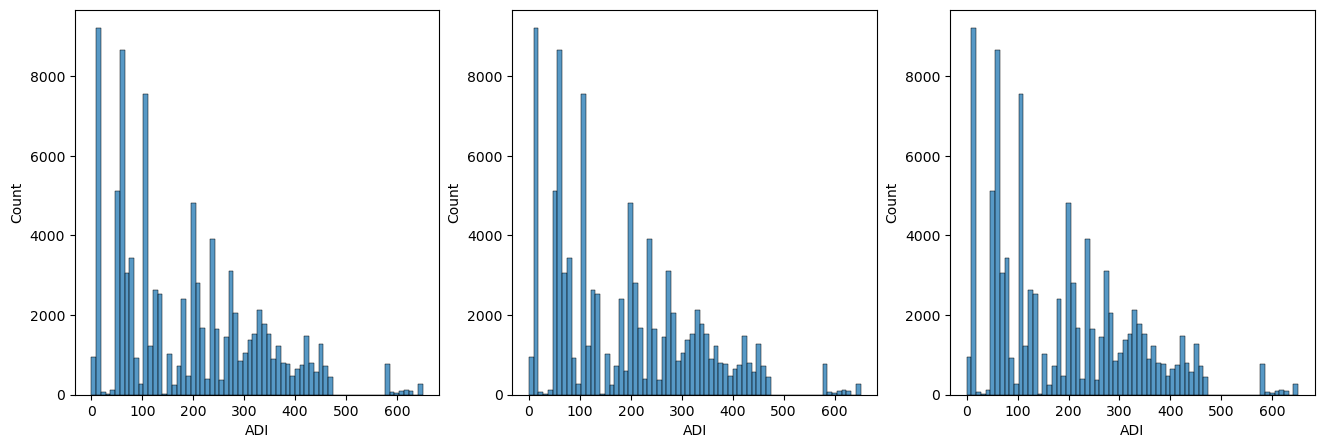

In [91]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data["ADI"], ax = ax[0])
sns.histplot(data["ADI"].fillna(np.mean(data["ADI"])), ax = ax[1])
sns.histplot(data["ADI"].fillna(np.median(data["ADI"])),ax = ax[2])
plt.show()

#I will fill with the median

data["ADI"]= data["ADI"].fillna(np.median(data["ADI"]))

In [89]:
# For DMA

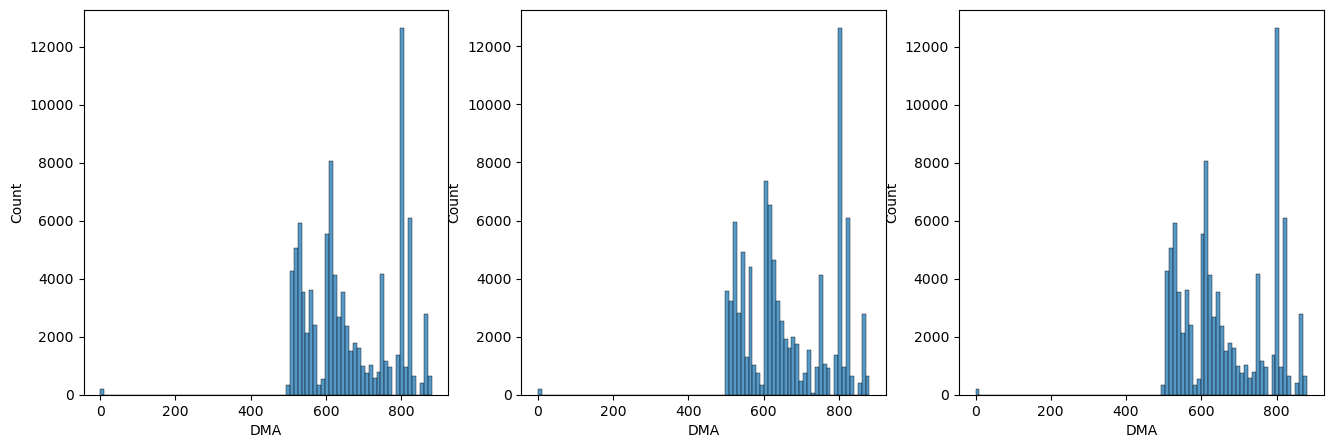

In [92]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data["DMA"], ax = ax[0])
sns.histplot(data["DMA"].fillna(np.mean(data["DMA"])), ax = ax[1])
sns.histplot(data["DMA"].fillna(np.median(data["DMA"])),ax = ax[2])
plt.show()

#I will fill with the median

data["DMA"]= data["DMA"].fillna(np.median(data["DMA"]))

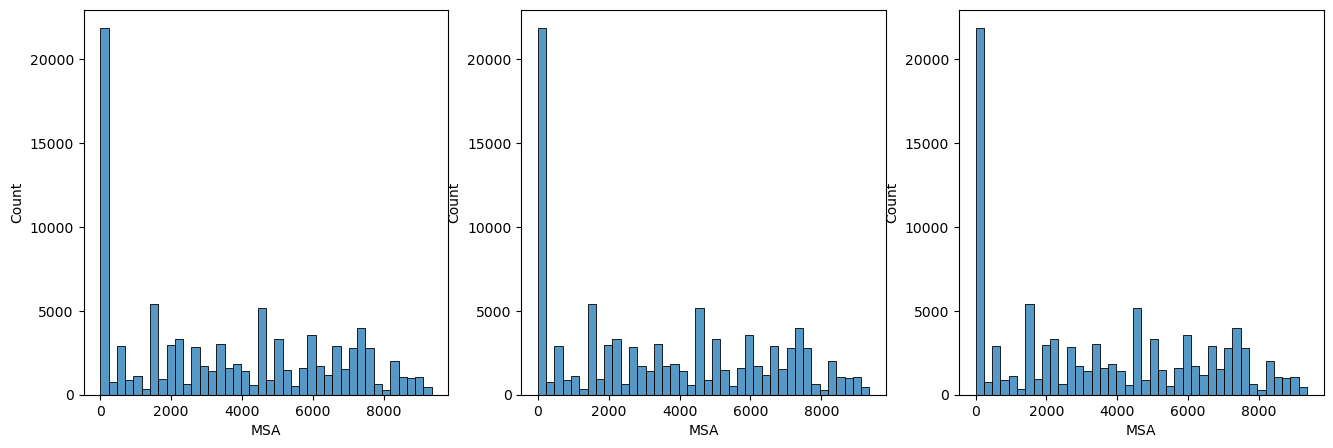

In [93]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(data["MSA"], ax = ax[0])
sns.histplot(data["MSA"].fillna(np.mean(data["MSA"])), ax = ax[1])
sns.histplot(data["MSA"].fillna(np.median(data["MSA"])),ax = ax[2])
plt.show()

#I will fill with the median

data["MSA"]= data["MSA"].fillna(np.median(data["MSA"]))